In [61]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
from datetime import datetime
MAX_REQUESTS = 1e4
print("imported")
import pandas as pd

imported


In [70]:
from queue import Queue
from threading import Thread
import time

items = []
def treat_job(q):
    while True:
        obj = q.get()
        job, s, (t11, t12), (t21,t22) = obj
        
        if job == 1:
            t11 = (datetime.utcnow()-start).total_seconds()*1000
            sleep_time = random.lognormvariate(1.5, 0.6)/1000
            time.sleep(sleep_time)
            t12 = (datetime.utcnow()-start).total_seconds()*1000
            q.put((2, s , (t11, t12), (t21, t22)))

        if job == 2:
            t21 = (datetime.utcnow()-start).total_seconds()*1000
            sleep_time = random.uniform(0.6,1)/1000
            time.sleep(sleep_time)
            t22 = (datetime.utcnow()-start).total_seconds()*1000
            items.append([s , t11, t12, t21, t22])

        q.task_done()

q = Queue(maxsize=0) 

worker = Thread(target=treat_job, args=(q,))
worker.setDaemon(True)
worker.start()
start = datetime.utcnow()

for _ in range(10**4):
    q.put((1, (datetime.utcnow()-start).total_seconds()*1000, (0, 0), (0,0)))
    time.sleep(random.expovariate(80))
print("Done putting into queue!")
q.join()
print("Queue done joining")

Done putting into queue!
Queue done joining


In [71]:
df = pd.DataFrame(items, columns = ['Start', 'T11', 'T12', 'T21', 'T22'])

In [80]:
df.head()

,Start,T11,T12,T21,T22
0,0.069,0.134,7.326,13.522,14.586
1,2.713,7.380,13.471,14.681,15.696
2,40.590,40.673,51.590,51.645,52.549
3,53.528,53.580,62.053,66.381,67.272
4,53.904,62.121,66.306,67.295,68.060


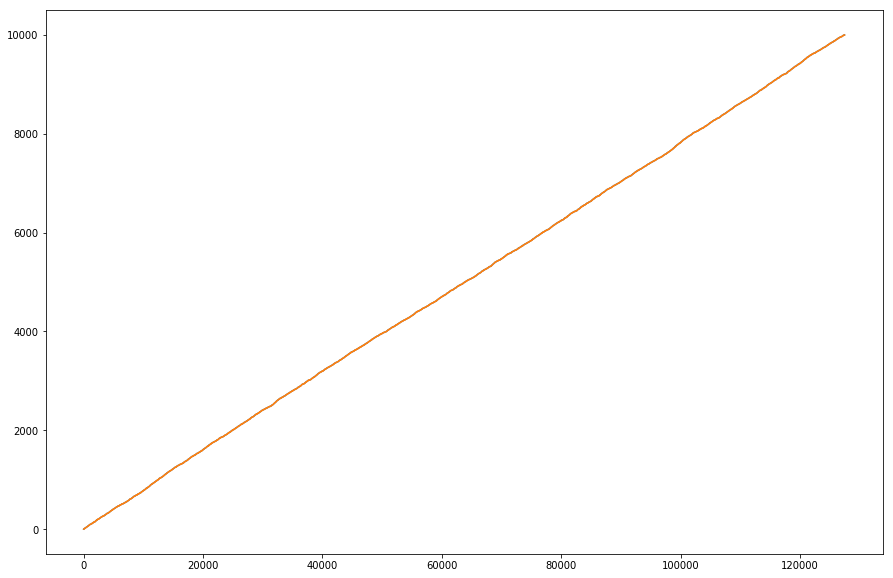

In [73]:
plt.figure(figsize=(15,10))
plt.plot(df['Start'], range(10**4))
plt.step(df['T22'], range(10**4))
plt.show()

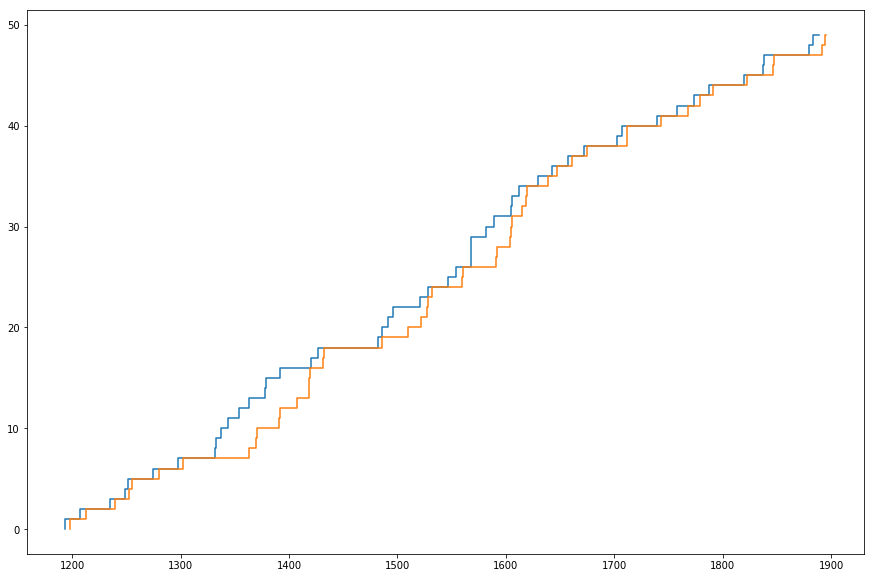

In [74]:
plt.figure(figsize=(15,10))
plt.step(df['Start'][100:150], range(50))
plt.step(df['T22'][100:150], range(50))
plt.show()

In [125]:
interesting_times = np.sort(np.concatenate((df['Start'].values, df['T12'].values)))
type1_in_queue = []
type2_in_queue = []
for t in interesting_times:
    type_ones = df[((df['Start'] - t) < 0) & ((df['T12'] - t > 0))]
    type_twos = df[((df['T12'] - t) < 0) & ((df['T22'] - t > 0))]
    type1_in_queue.append(len(type_ones))
    type2_in_queue.append(len(type_twos))

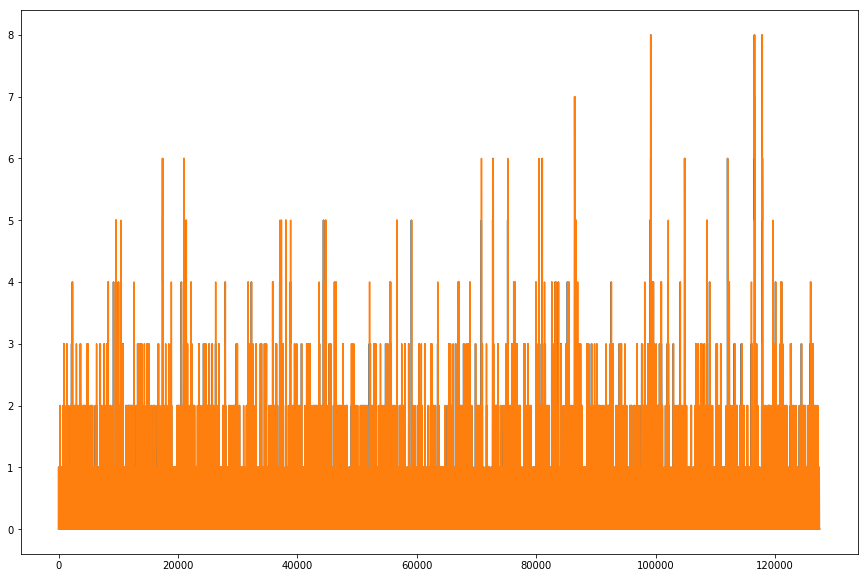

In [128]:
plt.figure(figsize=(15,10))
plt.plot(interesting_times, type1_in_queue)
plt.plot(interesting_times, type2_in_queue);
